<a href="https://colab.research.google.com/github/PervejHosen/Learning-Python-for-DataScience/blob/main/Practice(Class_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resources:**

Scikit-learn Machine Learning Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

# **Why Scikit-Learn?**

* Although the field of machine learning is vast, the main goal is finding patterns within data and then using those patterns to make predictions.

* And there are certain categories which a majority of problems fall into.

* If you're trying to create a machine learning model to predict whether an email is spam and or not spam, you're working on a classification problem (whether something is something(s) or another).

* If you're trying to create a machine learning model to predict the price of houses given their characteristics, you're working on a regression problem (predicting a number).

* Once you know what kind of problem you're working on, there are also similar steps you'll take for each. Steps like splitting the data into different sets, one for your machine learning algorithms to learn on and another to test them on. Choosing a machine learning model and then evaluating whether or not your model has learned anything.

* Scikit-Learn offers Python implementations for doing all of these kinds of tasks. Saving you having to build them from scratch.

# **Scikit-learn Documentation:**

https://scikit-learn.org/stable/user_guide.html

# **Importing Neccessary libraries**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data for Regression Problems**

California Housing Dataset: https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

**Lets convert the raw data into dataframe**

In [ ]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df["target"] = pd.Series(housing["target"])
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.shape

(20640, 9)

In [ ]:
#Let's try Ridge Regression as a Regression Problem

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#Fixing a random seed
np.random.seed(45)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6073997619464342

In [ ]:
# Let's try RandomForestRegressor model as an Ensemble Learning Method

from sklearn.ensemble import RandomForestRegressor

#Fixing a random seed
np.random.seed(45)

X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor(n_estimators = 150)
model.fit(X_train, y_train)

model.score(X_test, y_test) #Coefficient of Determination/R-Square

0.818422937482544

In [ ]:
# Use a trained model to make predictions
model.predict(X_test)

array([0.70480667, 1.97928667, 2.28677333, ..., 1.69078673, 0.64156   ,
       1.07674   ])

In [ ]:
len(model.predict(X_test))

4128

In [ ]:
y_test.head(5)

3046     0.658
6803     2.284
10112    2.411
3126     1.375
5008     1.930
Name: target, dtype: float64

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3247004492732561

## **Interpretation:**
* **This refers that on an average the differene between the original target value (median housing price) and the predicted value of the model is 0.3247.**

**Classification Algorithm/Model**

In [ ]:
### Choosing the Classification Algorithm/Model

# Data for Classification Problems
heart_disease = pd.read_csv("/content/drive/MyDrive/Python/Datasets/heart-disease.csv")
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
from sklearn.svm import LinearSVC

np.random.seed(45)

X= heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.3770491803278688

In [ ]:
# Now, try an Ensemble Learning Method (RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

X= heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8360655737704918

* **So, a huge improvement in terms of the prediction accuracy in the Ensemble learning Methods**

# Making predictions using a machine learning model:
* Now we've got a trained model, one which has hoepfully learned patterns in the data, we will want to use it to make predictions.

* Scikit-Learn enables this in several ways. Two of the most common and useful are ***predict()*** and ***predict_proba()***



In [ ]:
# Use a trained model to make predictions
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [ ]:
y_test.tail()

162    1
205    0
122    1
99     1
139    1
Name: target, dtype: int64

* Given data in the form of X, the predict() function returns labels in the form of y.

* It's standard practice to save these predictions to a variable named something like y_preds for later comparison to y_test or y_true (usually same as y_test just another name).

In [ ]:
# Compare predictions to truth
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8360655737704918

Another way of doing this is with Scikit-Learn's **accuracy_score()** function.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8360655737704918

***Note:*** For the predict() function to work, it must be passed X (data) in the same format the model was trained on. Anything different and it will return an error.

* **predict_proba()** returns the probabilities of a classification label.

In [ ]:
# Return probabilities rather than labels
clf.predict_proba(X_test[:10])

array([[0.02, 0.98],
       [0.34, 0.66],
       [0.04, 0.96],
       [0.29, 0.71],
       [0.45, 0.55],
       [0.35, 0.65],
       [0.66, 0.34],
       [0.93, 0.07],
       [0.12, 0.88],
       [0.6 , 0.4 ]])

In [ ]:
# Return labels
clf.predict(X_test[:10])

#Let's see the difference

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

* ***predict_proba()*** returns an array of ten arrays each containing two values.

* Each number is the probability of a label given a sample.

In [ ]:
# Find prediction probabilities for 1 sample
clf.predict_proba(X_test[:1])

array([[0.02, 0.98]])

* This output means the sample **X_test[:1]**, the model is predicting label 1 (index 0) with a probability score of 0.98.

* Because the score is over 0.5, when using **predict()**, a label of 1 is assigned.

In [ ]:
# Return the label for 1 sample
clf.predict(X_test[:1])

array([1])

## **Where does 0.5 come from?**

Because our problem is a binary classification task (heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5, for a certain label, it's assigned that label.

## **Evaluating a model**

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

**Another method of validating/evaluating model performance**


In [ ]:
# cross_val_score

from sklearn.model_selection import cross_val_score

np.random.seed(45)

X= heart_disease.drop("target", axis =1)
y = heart_disease["target"]

#X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf_cross_val_score = cross_val_score(clf, X, y, cv = 6)
print(clf_cross_val_score)

print(f"Average Cross Validation Score: {np.mean(clf_cross_val_score)*100:.2f} %")

[0.82352941 0.84313725 0.8627451  0.8        0.84       0.76      ]
Average Cross Validation Score: 82.16 %


* `cross_val_score()` returns an array where as `score()` only returns a single number.

* `cross_val_score()` returns an array because of a parameter called cv, which stands for cross-validation.

* When cv isn't set, `cross_val_score()` will return an array of 5 numbers by default

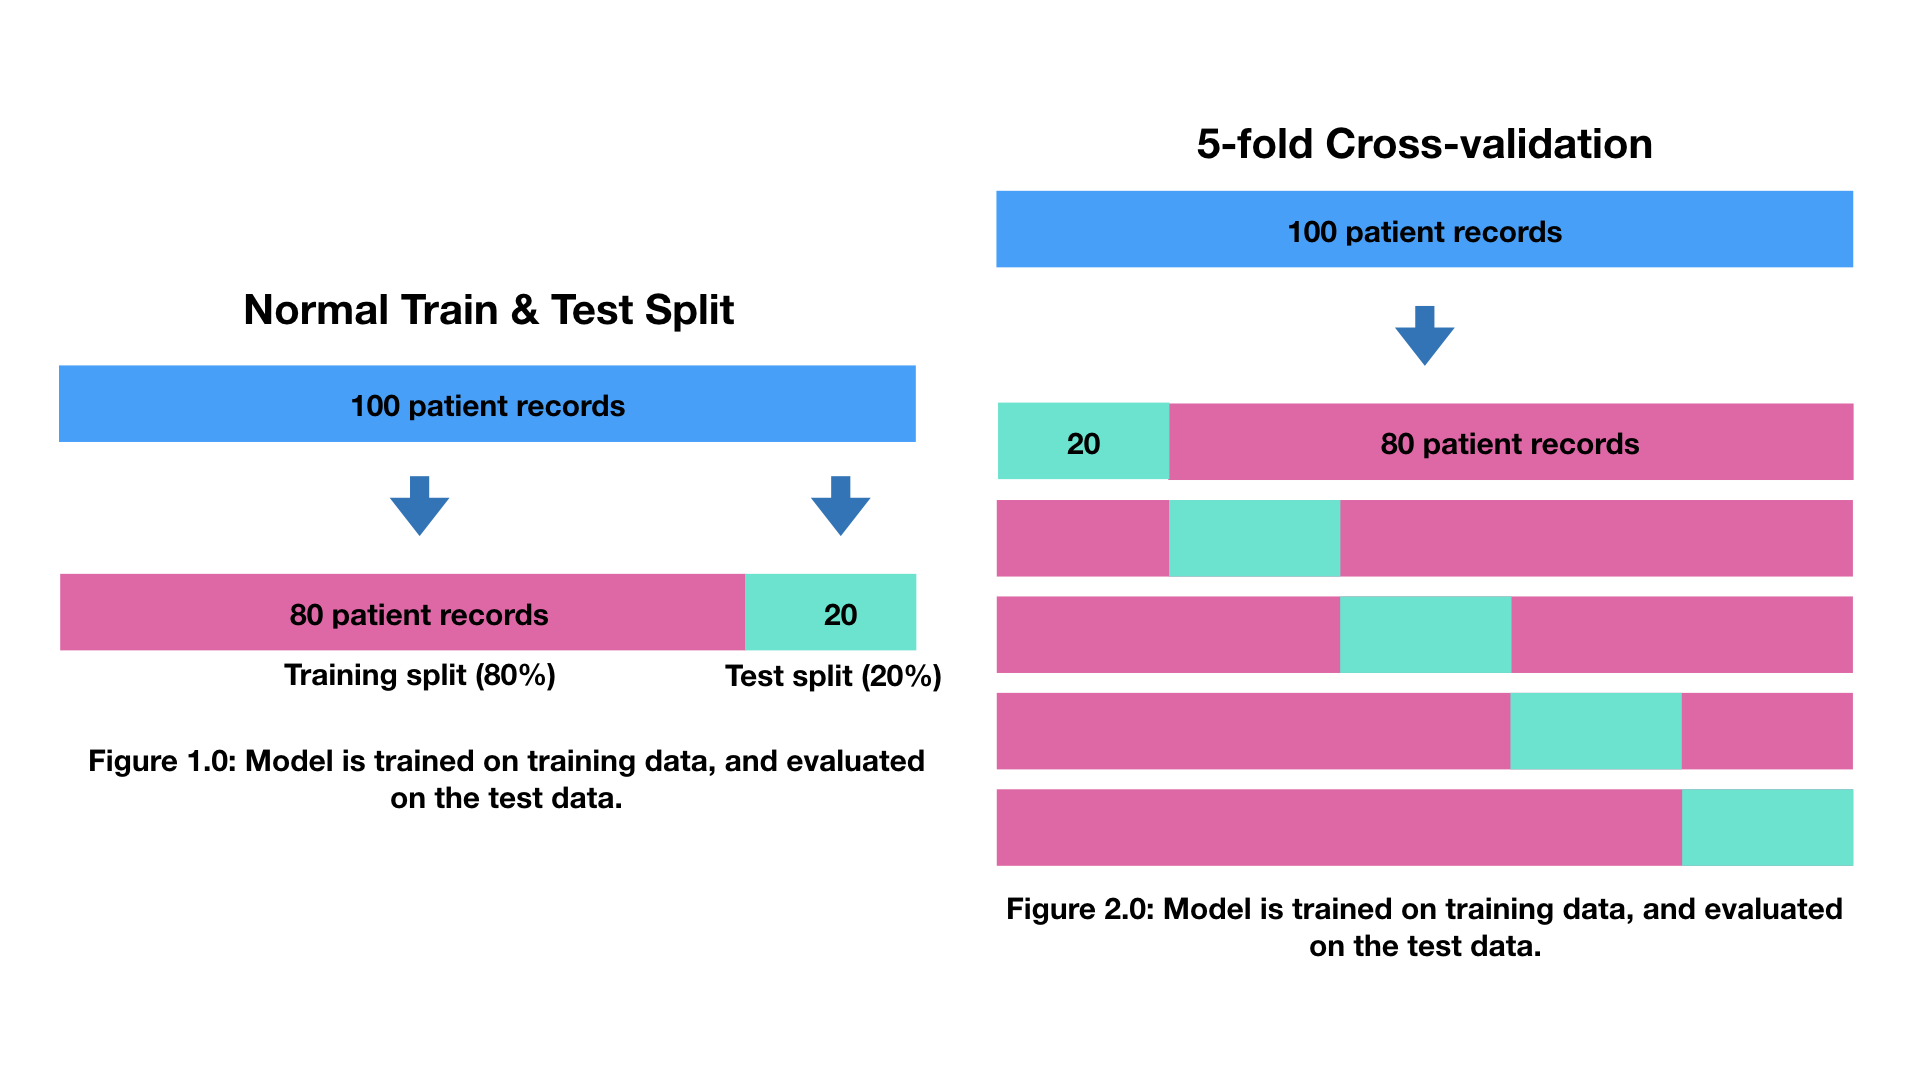

We've dealt with Figure on the left hand side before using score(X_test, y_test). But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure on the right hand side shows 5-fold cross-validation, a method which tries to provide a solution to:

Not training on all the data
Avoiding getting lucky scores on single splits of the data
Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a different split each time, returning a score for each.

## **Why 5-fold?**

The actual name of this setup K-fold cross-validation. Where K is an abitrary number. We've used 5 because it looks nice visually, and is default in Scikit-Learn from version 0.22 onwards.

***Area Under Receiver Operating Characteristic (ROC) Curve:***

It refers to as *AUC* for **Area Under Curve** and the curve we're talking about is the **Receiver Operating Characteristic** or *ROC* for short.

***ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).***

For clarity:

True positive = model predicts 1 when truth is 1

False positive = model predicts 1 when truth is 0

True negative = model predicts 0 when truth is 0

False negative = model predicts 0 when truth is 1

In [ ]:
from sklearn.metrics import roc_curve

from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

X= heart_disease.drop("target", axis =1)
y = heart_disease["target"]

X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keeping the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
print(fpr)
# Check the true positive rate
print(tpr)

#check the threshold value
print(thresholds)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04347826 0.04347826
 0.08695652 0.08695652 0.08695652 0.08695652 0.13043478 0.13043478
 0.13043478 0.13043478 0.13043478 0.39130435 0.39130435 0.47826087
 0.47826087 0.52173913 0.60869565 0.73913043 0.86956522 0.86956522
 0.91304348 1.        ]
[0.         0.02631579 0.07894737 0.13157895 0.15789474 0.21052632
 0.31578947 0.34210526 0.39473684 0.44736842 0.44736842 0.55263158
 0.57894737 0.60526316 0.71052632 0.76315789 0.76315789 0.81578947
 0.84210526 0.89473684 0.92105263 0.92105263 0.94736842 0.94736842
 0.97368421 0.97368421 0.97368421 0.97368421 0.97368421 1.
 1.         1.        ]
[2.   1.   0.98 0.96 0.94 0.93 0.9  0.89 0.88 0.83 0.82 0.68 0.66 0.65
 0.58 0.54 0.52 0.51 0.5  0.49 0.48 0.25 0.24 0.18 0.17 0.16 0.12 0.1
 0.07 0.06 0.04 0.  ]


***roc_curve*** Documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

In [ ]:
roc_curve(y_test, y_probs)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04347826, 0.04347826, 0.08695652, 0.08695652, 0.08695652,
        0.08695652, 0.13043478, 0.13043478, 0.13043478, 0.13043478,
        0.13043478, 0.39130435, 0.39130435, 0.47826087, 0.47826087,
        0.52173913, 0.60869565, 0.73913043, 0.86956522, 0.86956522,
        0.91304348, 1.        ]),
 array([0.        , 0.02631579, 0.07894737, 0.13157895, 0.15789474,
        0.21052632, 0.31578947, 0.34210526, 0.39473684, 0.44736842,
        0.44736842, 0.55263158, 0.57894737, 0.60526316, 0.71052632,
        0.76315789, 0.76315789, 0.81578947, 0.84210526, 0.89473684,
        0.92105263, 0.92105263, 0.94736842, 0.94736842, 0.97368421,
        0.97368421, 0.97368421, 0.97368421, 0.97368421, 1.        ,
        1.        , 1.        ]),
 array([2.  , 1.  , 0.98, 0.96, 0.94, 0.93, 0.9 , 0.89, 0.88, 0.83, 0.82,
        0.68, 0.66, 0.65, 0.58, 0.54, 0.52

* Looking at these on their own doesn't make much sense.
* It's much easier to see their value visually.

* Since Scikit-Learn doesn't have a built-in function to plot a ROC curve, quite often, you'll find a function (or write your own) like the one below.

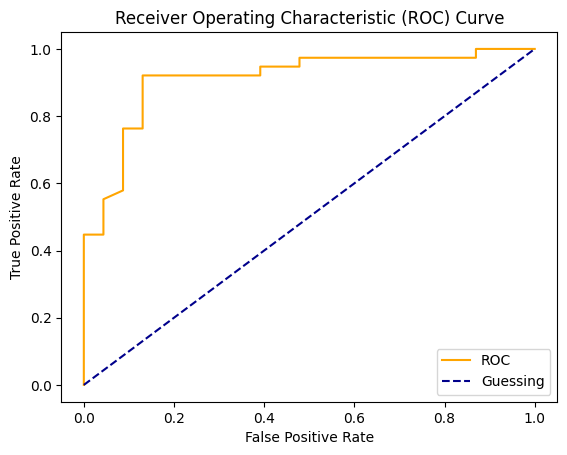

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

* The main thing to take away here is our model is doing far better than guessing.

* A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve). Scikit-Learn implements a function to caculate this called `roc_auc_score()`
* The maximum `ROC` `AUC` score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

0.9113272311212816

* The most ideal position for a ROC curve to run along the top left corner of the plot.

* This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.

## ***Confusion Matrix:***

* The next way to evaluate a classification model is by using a confusion matrix.

* A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[20,  3],
       [ 7, 31]])

In [ ]:
#Again, this is probably easier visualized.
#One way to do it is with pd.crosstab()

pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,20,3
1,7,31


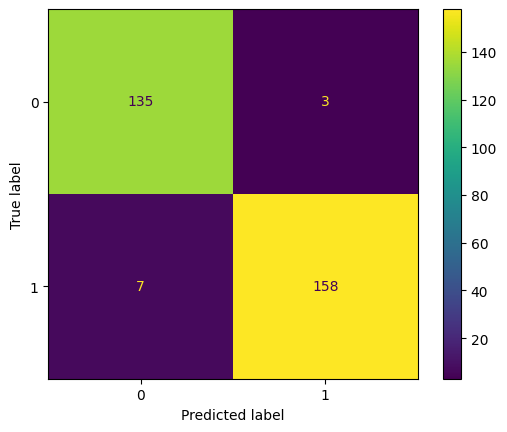

In [ ]:
#Creating a confusion matrix using Scikit-Learn

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

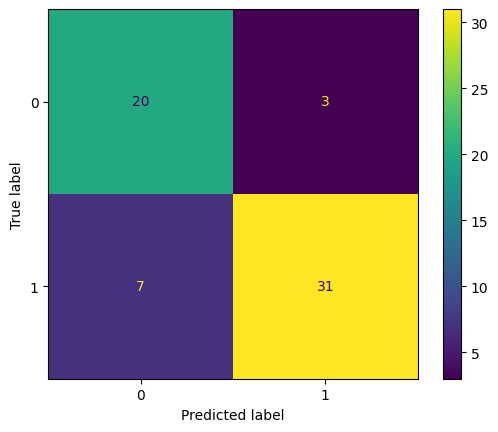

In [ ]:
# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds);

## ***Classification report***

* The final major metric you should consider when evaluating a classification model is a classification report.

* A classification report is more so a collection of metrics rather than a single one.

* You can create a classification report using Scikit-Learn's `classification_report()` function.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        23
           1       0.91      0.82      0.86        38

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.85      0.84      0.84        61



**It returns four columns:**
   * precision
   * recall
   * f1-score and
   * support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell **accuracy, macro avg and weighted avg**.

Each term measures something slightly different.

**Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

**Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

**F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

**Support***- The number of samples each metric was calculated on.

**Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.

**Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. **Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.**

**Weighted avg ** - Short for weighted average, the weighted average precision, recall and F1 score between classes. **Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class** (e.g. it will give a high value when one class out performs another due to having more samples).

## ***When should you use each?***

* It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

* For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

* You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

* In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


* You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

* Ask yourself, although the model achieves 99.99% accuracy, is it useful?

***To summarize:***

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)

* Precision and recall become more important when classes are imbalanced.

* If false positive predictions are worse than false negatives, aim for higher precision.

* If false negative predictions are worse than false positives, aim for higher recall.

## ***Regression model evaluation metrics:***

* **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.


* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.


* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [ ]:
# Calculate the models R^2 score
#Once you've got a trained regression model, the default evaluation metric in the score() function is R^2.

model.score(X_test, y_test)

0.8066196804802649

In [ ]:
#Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.
from sklearn.metrics import r2_score

y_preds = model.predict(X_test)

r2_score(y_test, y_preds)

0.8066196804802649

***For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.***

## **Mean Absolute Error (MAE):**

* A model's mean absolute error can be calculated with Scikit-Learn's mean_absolute_error() function.

In [ ]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_preds)
mae

0.3265721842781009

* Our model achieves an MAE of 0.3265.
* This means, on average our models predictions are 0.3265 units away from the actual value.

In [ ]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predictions": y_preds})

df

,actual values,predictions
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
...,...,...
15362,2.63300,2.220380
16623,2.66800,1.947760
18086,5.00001,4.836378
2144,0.72300,0.717820


* You can see the predictions are slightly different to the actual values.

* Depending what problem you're working on, having a difference like we do now, might be okay.
* On the flip side, it may also not be okay, meaning the predictions would have to be closer.

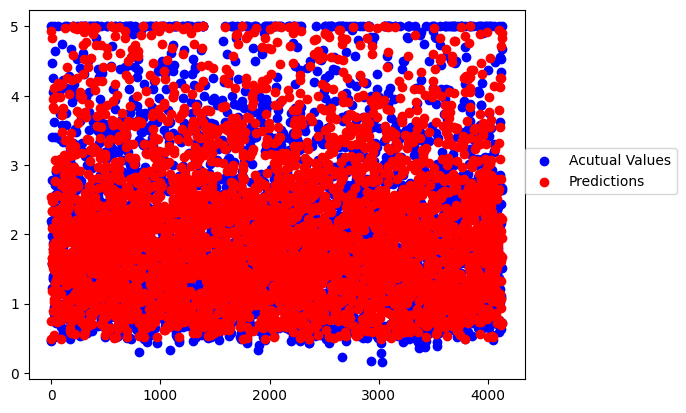

In [ ]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

## **Mean Squared Error (MSE):**

How about MSE? We can calculate it with Scikit-Learn's mean_squared_error().

In [ ]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

* MSE will be usually higher than MAE because is squares the errors rather than only taking the absolute difference into account;

* But, it would be smaller when the differences are less than 1.

* It's more sensitive to outliers.

**Now you might be thinking, which regression evaluation metric should you use?**

* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.


* MAE gives a better indication of how far off each of your model's predictions are on average.


* As for MAE or MSE, in the presence of outlier MSE would be significantly higher.

# **Using different evaluation metrics together with Scikit-Learn:**

## ***For Classification Problems:***

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


## ***For Regression Problems:***

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model
print("Regression model metrics on the test set:")
print(f"R^2: {r2_score(y_test, y_preds):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_preds):.2f}")

Regression model metrics on the test set:
R^2: 0.81
MAE: 0.33
MSE: 0.25
